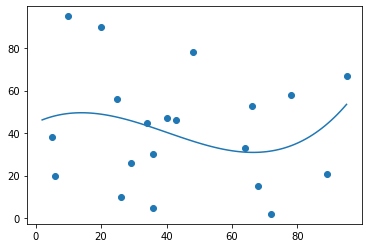

In [1]:
# bad fit

import numpy as np
import matplotlib.pyplot as plt

x = [89,43,36,36,95,10,66,34,78,26,29,48,20,64,5,6,25,72,40,68]
y = [21,46,30,5,67,95,53,45,58,10,26,78,90,33,38,20,56,2,47,15]

myModel = np.poly1d(np.polyfit(x,y,3))
myLine = np.linspace(2,95,100)

plt.scatter(x,y)
plt.plot(myLine, myModel(myLine))
plt.show()

In [2]:
# R-Squared for bad fit

import numpy as np
from sklearn.metrics import r2_score

x = [89,43,36,36,95,10,66,34,78,26,29,48,20,64,5,6,25,72,40,68]
y = [21,46,30,5,67,95,53,45,58,10,26,78,90,33,38,20,56,2,47,15]

model = np.poly1d(np.polyfit(x,y,3))
print(r2_score(y, model(x)))

0.06979278164133573


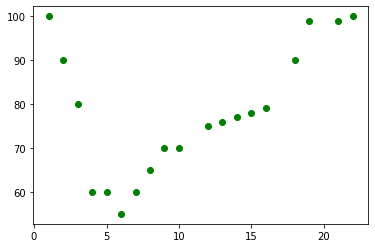

In [3]:
# step-1 Data
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,77,78,79,90,99,99,100]

plt.scatter(x,y, color="green")
plt.show()

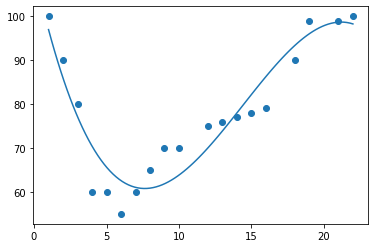

In [4]:
# Step-2 Draw the Line

import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,77,78,79,90,99,99,100]

myModel = np.poly1d(np.polyfit(x,y,3))
myLine = np.linspace(1,22,100)

plt.scatter(x,y)
plt.plot(myLine, myModel(myLine))
plt.show()

In [5]:
# Step-3 Rsquared

import numpy as np
from sklearn.metrics import r2_score

x = [1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,77,78,79,90,99,99,100]

model = np.poly1d(np.polyfit(x,y,3))
print(r2_score(y, model(x)))

0.8789644615053509


In [6]:
import numpy as np
from sklearn.metrics import r2_score

x = [1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,77,78,79,90,99,99,100]

speed = myModel(18)
print(speed)

93.37221238372712


# Hands on Example

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [8]:
df = pd.read_csv("https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [9]:
X = df.iloc[:,1:2].values
y = df.iloc[:,2].values

In [10]:
# Splitting the dataset into train test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [11]:
# Training and fitting
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

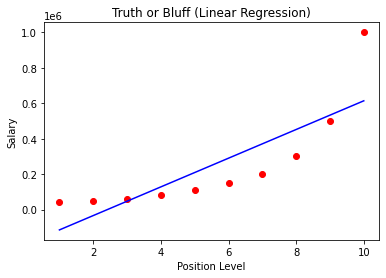

In [12]:
# Visualizing the Linear Regression Result
def viz_linear():
    plt.scatter(X,y, color="red")
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title("Truth or Bluff (Linear Regression)")
    plt.xlabel("Position Level")
    plt.ylabel("Salary")
    plt.show()
    return
viz_linear()

In [13]:
# Fitting Polynomial Regression to the dataset

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

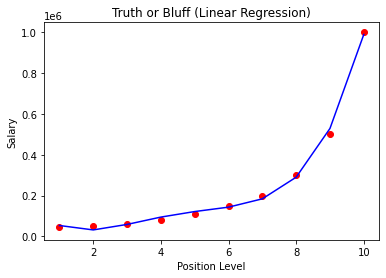

In [14]:
def viz_poly():
    plt.scatter(X,y, color="red")
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title("Truth or Bluff (Linear Regression)")
    plt.xlabel("Position Level")
    plt.ylabel("Salary")
    plt.show()
    return
viz_poly()

In [15]:
# Predicting a new result with Linear Regression

pred_linear = lin_reg.predict([[11]])

In [16]:
# Predicting a new result with Polynomial Regression

pred_polynomial = pol_reg.predict(poly_reg.fit_transform([[11]]))

In [17]:
print("Linear Regression Result  =", pred_linear)
print("Polynomial Regression Result  =", pred_polynomial)

print("The Difference is  =", pred_linear - pred_polynomial)


Linear Regression Result  = [694333.33333333]
Polynomial Regression Result  = [1780833.33333284]
The Difference is  = [-1086499.99999951]
